<a href="https://colab.research.google.com/github/202311003/idm_assignment_2/blob/202311006/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/MyDrive/project2.csv')

<ipython-input-4-6d5908ef418e>:1: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/project2.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [6]:
region_mapping = {
    'Region A': 1,
    'Region B': 2,
    'Region C': 3,
    # Add more regions as needed
}

df['Health Service Area'] = df['Health Service Area'].map(region_mapping)



In [7]:
county_mapping = {county: i for i, county in enumerate(df['Hospital County'].unique(), 1)}

df['Hospital County'] = df['Hospital County'].map(county_mapping)


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Facility Name'] = label_encoder.fit_transform(df['Facility Name'])


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])



In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Race'] = label_encoder.fit_transform(df['Race'])


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])


In [13]:
import pandas as pd

# Define a function to extract numeric values
def extract_numeric(value):
    numeric_part = ''.join(filter(str.isdigit, str(value)))
    return int(numeric_part) if numeric_part else 0  # Return 0 for missing or non-numeric values

# Apply the function to the "Length of Stay" column
df['Length of Stay'] = df['Length of Stay'].apply(extract_numeric)





In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Type of Admission'] = label_encoder.fit_transform(df['Type of Admission'])


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Patient Disposition'] = label_encoder.fit_transform(df['Patient Disposition'])


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['CCS Diagnosis Description'] = label_encoder.fit_transform(df['CCS Diagnosis Description'])


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['CCS Procedure Description'] = label_encoder.fit_transform(df['CCS Procedure Description'])


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['APR DRG Description'] = label_encoder.fit_transform(df['APR DRG Description'])


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['APR MDC Description'] = label_encoder.fit_transform(df['APR MDC Description'])


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['APR Severity of Illness Description'] = label_encoder.fit_transform(df['APR Severity of Illness Description'])

df['APR Risk of Mortality'] = label_encoder.fit_transform(df['APR Risk of Mortality'])


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['APR Medical Surgical Description'] = label_encoder.fit_transform(df['APR Medical Surgical Description'])


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Source of Payment 1'] = label_encoder.fit_transform(df['Source of Payment 1'])


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Source of Payment 2'] = label_encoder.fit_transform(df['Source of Payment 2'])


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Source of Payment 3'] = label_encoder.fit_transform(df['Source of Payment 3'])


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Abortion Edit Indicator'] = label_encoder.fit_transform(df['Abortion Edit Indicator'])


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Emergency Department Indicator'] = label_encoder.fit_transform(df['Emergency Department Indicator'])


In [27]:
# Drop the 'Zip Code - 3 digits' column
df = df.drop('Zip Code - 3 digits', axis=1)



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 37 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  float64
 2   Hospital County                      int64  
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        int64  
 6   Age Group                            int64  
 7   Gender                               int64  
 8   Race                                 int64  
 9   Ethnicity                            int64  
 10  Length of Stay                       int64  
 11  Type of Admission                    int64  
 12  Patient Disposition                  int64  
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   float64
 15  CCS Diagnosis Description       

In [33]:
df = df.drop(df[df.Gender == 'U'].index)
df = df.drop(df[df.Race == 'Unknown'].index)
df = df.drop(df[df.Ethnicity == 'Unknown'].index)
df = df.drop(df[df['Source of Payment 1'] == 'Unknown'].index)
df = df.drop(df[df['Type of Admission'] == 'Not Available'].index)
df = df.drop(df[df['Patient Disposition'] == 'Another Type Not Listed'].index)

In [34]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

labled_df = df

columns_to_encode = ['Health Service Area','Hospital County','Facility Name','Age Group', 'Gender','Race','Ethnicity','Type of Admission','Patient Disposition','CCS Diagnosis Description',
                      'CCS Procedure Description','APR DRG Description','APR MDC Description',
                     'APR Severity of Illness Description','APR Risk of Mortality','APR Medical Surgical Description','Source of Payment 1','Source of Payment 2','Source of Payment 3','Abortion Edit Indicator','Emergency Department Indicator']
# Fit and transform the 'Color' column
labled_df[columns_to_encode] = labled_df[columns_to_encode].apply(label_encoder.fit_transform)

labled_df[columns_to_encode]

,Health Service Area,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Description,...,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Abortion Edit Indicator,Emergency Department Indicator
0,0,0,3,1,0,3,0,1,7,105,...,196,4,2,2,0,0,7,10,0,1
1,0,0,3,3,1,3,0,1,8,161,...,163,20,1,0,2,2,4,0,0,1
2,0,0,3,4,1,3,0,1,8,228,...,61,4,1,1,0,4,0,7,0,0
3,0,0,3,4,0,3,0,0,8,222,...,273,25,3,2,0,4,2,7,0,0
4,0,0,3,4,0,3,0,0,12,144,...,101,10,2,2,2,4,2,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,0,57,0,2,0,1,0,1,8,186,...,237,24,1,2,2,0,7,10,1,1
2622129,0,57,0,2,0,1,0,5,7,186,...,56,24,3,2,2,0,7,10,1,0
2622130,0,57,0,2,0,1,0,1,7,102,...,56,24,2,2,2,2,7,10,1,1
2622131,0,57,0,2,0,1,0,1,7,186,...,56,24,2,2,2,7,10,10,1,1


In [35]:
# new_df = labled_df['Health Service Area','Hospital County','Facility ID','Age Group','Zip Code - 3 digits','Gender','Race','Ethnicity','Length of Stay','Type of Admission']
columns_to_drop = ['index', 'Health Service Area','Hospital County','Operating Certificate Number','Facility Name','Discharge Year','Source of Payment 2','Source of Payment 3','Attending Provider License Number','Operating Provider License Number','Other Provider License Number','Abortion Edit Indicator','Emergency Department Indicator','Total Charges','Total Costs']
new_df = labled_df.drop(columns=columns_to_drop)

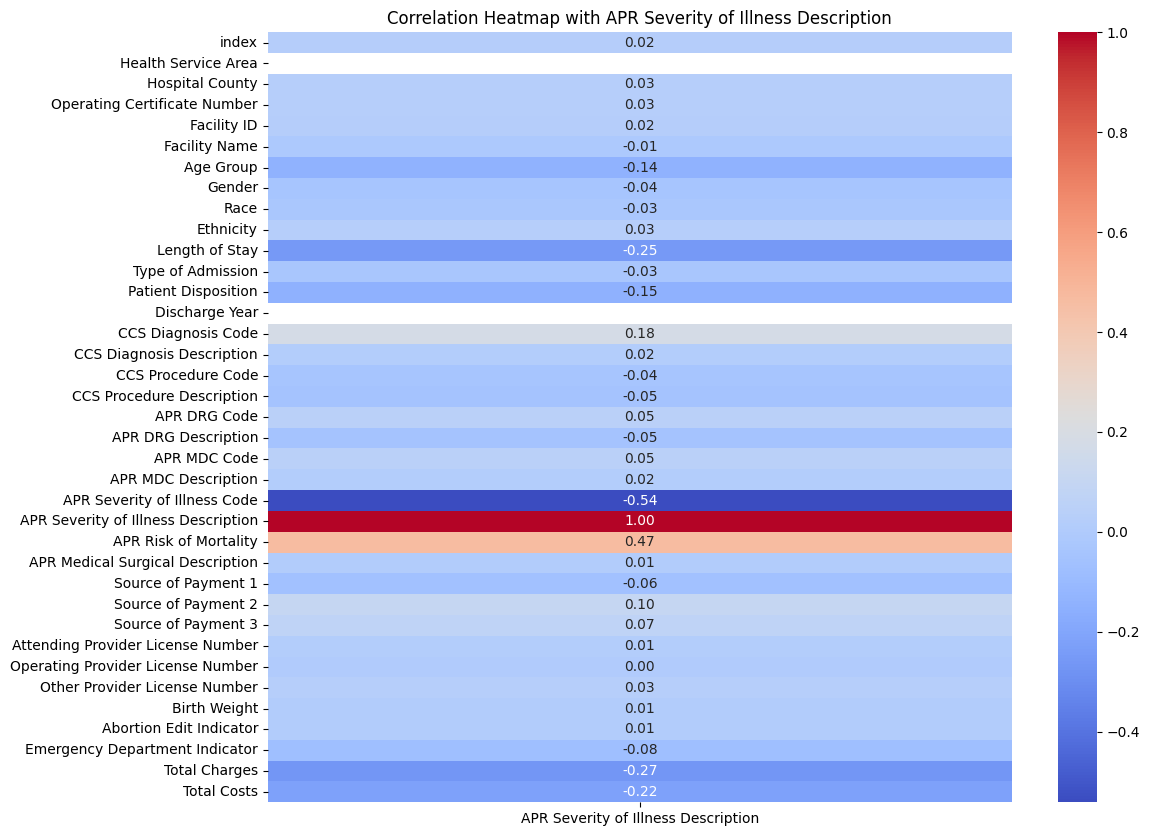

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared your dataset

# Create a correlation matrix between all features
correlation_matrix = df.corr()

# Set the target variable
target_variable = "APR Severity of Illness Description"

# Calculate the correlations between the target variable and other features
correlations = correlation_matrix[target_variable]

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations.to_frame(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title(f'Correlation Heatmap with {target_variable}')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

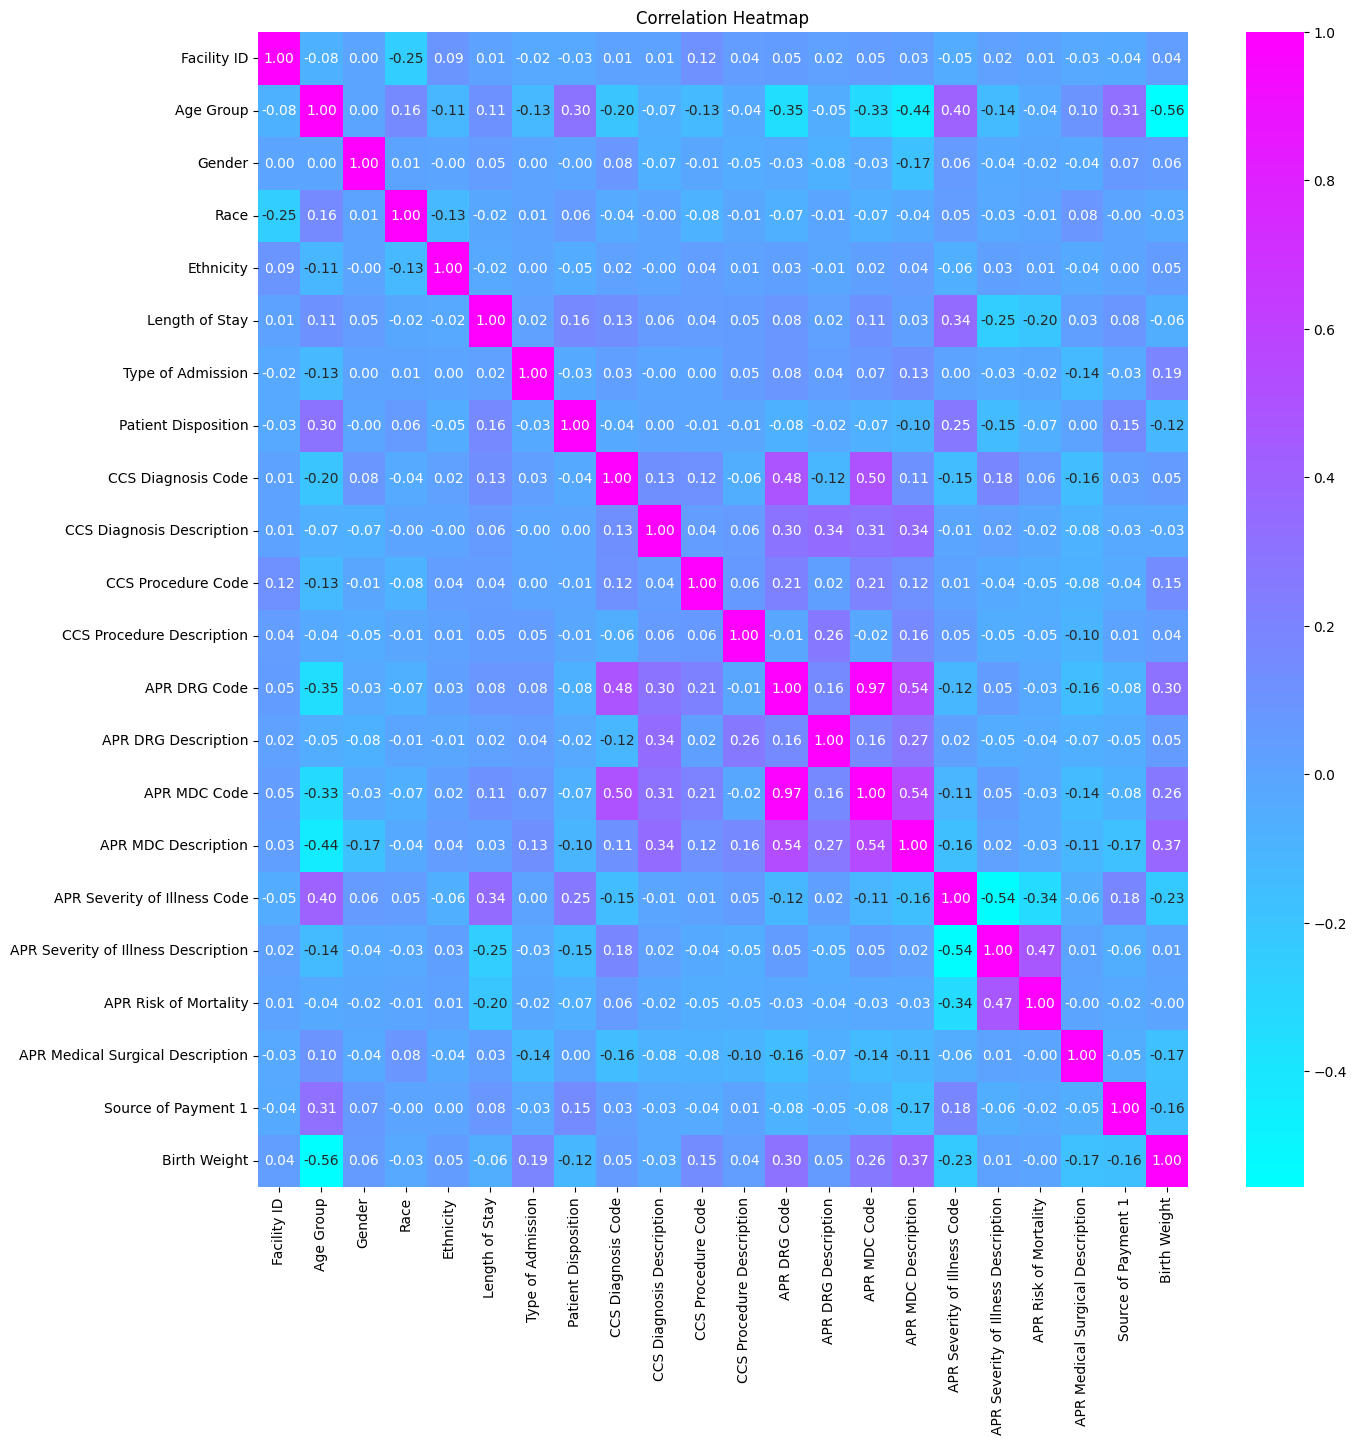

In [36]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Heatmap')

In [37]:
new_df = new_df.dropna()
X = new_df.drop(columns=['APR Severity of Illness Description','APR Severity of Illness Code'])
y = new_df[['APR Severity of Illness Code']]

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create your feature matrix (X) and target vector (y)
# X should contain your features, and y should contain your target labels.

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train to a 1D array
y_train = y_train.values.ravel()

# Create a RandomForestClassifier model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=7,       # Maximum depth of each tree
    random_state=42    # Random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.64
